In [27]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # print(data[0],data[1],data[2])
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    # print("data type=", type(data))
    # Return the complex numpy array.
    return data

## Importing dataset


dataSetI = getData(f"../dataset/tcp_all_0/tcp_all_0_freq=50.0em_capture.cfile")
dataSetJ = getData(f"../dataset/tcp_all_1/tcp_all_1_freq=90.0em_capture.cfile")




In [28]:
min_length = min(len(dataSetI), len(dataSetJ), 100000)

dataSetI = dataSetI[:min_length]
dataSetJ = dataSetJ[:min_length]

0.9594945


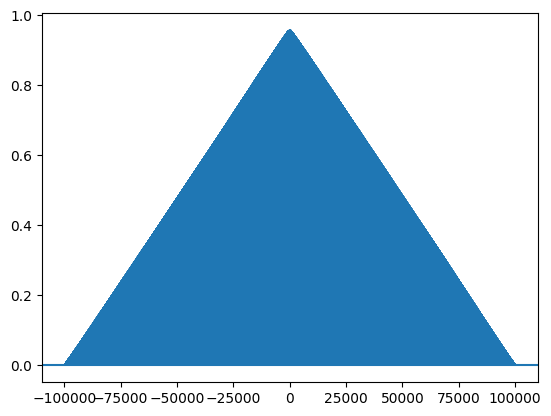

In [29]:
# Calculate autocorrelation using plt.xcorr
corr = plt.xcorr(abs(dataSetI), abs(dataSetJ), maxlags=None, normed=True)
# print(corr.c)
# Extract lags and correlation values
# lags = corr[1]
corr_values = corr[1]

print(corr_values[np.argmax(corr_values)])

# # Check if the peak value aligns with 1.0
is_peak_aligned = np.allclose(corr_values[np.argmax(corr_values)], 1.0, rtol=1e-5)

# # Print the result
# if is_peak_aligned:
#     print("The peak value aligns with 1.0.")
# else:
#     print("The peak value does not align with 1.0.")

ValueError: x and y must have same first dimension, but have shapes (3997,) and (1999,)

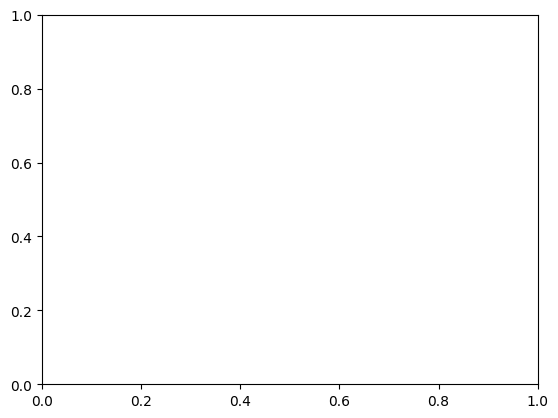

In [24]:
# Compute cross-correlation between the datasets
cross_corr = np.correlate(abs(dataSetJ), abs(dataSetJ), mode='full')
lags = np.arange(-len(cross_corr) + 1, len(cross_corr))

# Plot the cross-correlation data
plt.plot(lags, cross_corr)
plt.title('Cross-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.grid(True)
plt.show()

In [9]:
print(dataSetJ)

[-0.015625 -0.0234375j -0.015625 -0.015625j  -0.0078125-0.0234375j
 -0.015625 -0.015625j  -0.0234375-0.0234375j -0.015625 -0.015625j
 -0.015625 -0.015625j  -0.015625 -0.015625j  -0.015625 -0.015625j
 -0.015625 -0.0234375j -0.015625 -0.015625j  -0.015625 -0.0078125j
 -0.0234375-0.0234375j -0.0078125-0.0078125j -0.015625 -0.0234375j
 -0.015625 -0.015625j  -0.015625 -0.0234375j -0.015625 -0.015625j
 -0.015625 -0.0234375j -0.015625 -0.015625j  -0.015625 -0.015625j
 -0.015625 -0.0234375j -0.015625 -0.0234375j -0.015625 -0.0234375j
 -0.015625 -0.015625j  -0.015625 -0.015625j  -0.0234375-0.03125j
 -0.0234375-0.015625j  -0.015625 -0.015625j  -0.0078125-0.015625j
 -0.0234375-0.015625j  -0.0234375-0.015625j  -0.015625 -0.015625j
 -0.0078125-0.0234375j -0.015625 -0.0234375j -0.015625 -0.0234375j
 -0.0078125-0.0234375j -0.0234375-0.015625j  -0.015625 -0.0234375j
 -0.015625 -0.0234375j -0.015625 -0.015625j  -0.015625 -0.015625j
 -0.015625 -0.015625j  -0.0234375-0.015625j  -0.0234375-0.03125j
 -0.01